# Machine learning Basics



## Context:

The purpose of this homework is to use simple machine learning techniques to fit the model against a given stress-strain dataset. Therefore, we use the experimental stress-strain data on vulcanised rubber published by Treloar [1]. These data are given in pairs of principal stretches $\lambda_i$ and principal 1st-Piola-Kirchhoff (PK) stresses $P_i$ for different deformation modes, e.g. uniaxialtension (UN), equibiaxial tension (EB), and pure shear (PS). 

In order to determine an optimal set of material parameters for each model and a particular deformation mode, different techniques can be used which require in general the analytical $P_i(\lambda_i)$-formulations. In the standard continuum mechanics the stresses and strains are related by a strain energy function $\Psi$ that depends on a set of material parameters and invariants. However, in this homework we don't want to introduce these. Instead we use simplified linear and polynomial functions to fit the data and will come back to the strain-energy functions in a later exercise or if you are interested you can have a look in [2,3].

[1] L.R.G. Treloar; Stress-strain data for vulcanised rubber under various types of deformation (1944) \
[2] P. Steinmann, M.Hossain and G. Possar; Hyperelastic models for rubber-like materials: consistent tangent operators and suitability for Treloar’s data (2011) \
[3] K. Linka et. al; Constitutive artificial neural networks: A fast and general approach to predictive data-driven constitutive modeling by deep learning (2020) 

## Libraries:
Here, we will use `sklearn` and `statsmodels` packages for regression analysis. sklearn focuses on prediction analysis, while statsmodels provides detailed statistical output for linear regression analysis.


Within this homework the following resources might be useful for you: pandas, numpy, sklearn (scikit-learn), statsmodels and seaborn
| Library | Informations |
| -------- | ------- |
|`pandas`| data analysis tool for creating data structures. See https://pandas.pydata.org/ |
|`numpy`| scientific computing package with more common Python functionalities. See https://numpy.org/ |
|`scikit-learn`| tool package for predictive analysis. See https://scikit-learn.org/stable/ |
|`statsmodels`| statistical computating package including descriptive statistics and estimation and inference for statistical models. See https://www.statsmodels.org/stable/index.html |
|`seaborn`| data visualization library based on matplotlib. See https://seaborn.pydata.org/|

## Where to find the data

The datasets that we will use are available in Stud.IP in **exercise_1.zip** under **./data**: 

* treloar_uniaxial_tension.csv
* treloar_equibiaxial_tension.csv 
* treloar_pure_shear.csv

## Exercise 1: Linear Regression
### Task 1
1.1.  Load the dataset `treloar_uniaxial_tension.csv` containing data about the stresses and strains into memory using the library `pandas`. First, load the data directly from the file. Then, print the first $3$ rows of the dataset.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

In [2]:
# Load the *.csv data
df_ut = pd.read_csv("./data/treloar_uniaxial_tension.csv", delimiter=" ")

# View the first three rows of the loaded data
df_ut.head(3)

,strains,stresses
0,1.000000,0.000000
1,1.024232,0.028251
2,1.121145,0.131851


1.2. Visualize the data in a scatter plot where the stresses are plotted over the strains.

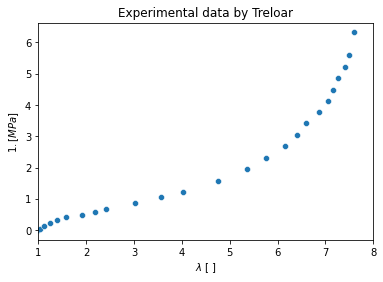

In [9]:
# We use for here for the visualization the seaborn library
ax = sns.scatterplot(x =  df_ut["strains"], y =  df_ut["stresses"], data=df_ut)
ax.set(xlabel=r'$\lambda \ [\ ]$', ylabel=r'$1.  [MPa]$', title='Experimental data by Treloar')
ax.set_xlim(1,8)
plt.show()

1.3. Next, we want to perform a regression analysis to fit a linear model to the stress-strain data using the sklearn `LinearRegression()` function from the `scikit-learn` library. It employs the ordinary least squares (OLS) method for regression analysis. Apply the whole data for the training sets. Which linear function do you get from this linear regression analysis? 

In [10]:
# Extract the features and targets and use the whole data set as a training set
stresses = df_ut['stresses']
strains = df_ut['strains']

# Reshape the strain data, since sklearn requires a 2D array for the features
strains_train= np.array(strains).reshape(-1, 1) 
stresses_train = np.array(stresses)

# Initiate and fit the regression model
model = linear_model.LinearRegression()
model.fit(strains_train, stresses_train)

# Display regression coefficient (slope) and y-intercept
print("Linear Equation: y = %.4ex + (%.4e)"%(model.coef_[0], model.intercept_))

Linear Equation: y = 7.4986e-01x + (-1.0952e+00)


1.4. There are different types of metrics such as mean squared error (MSE), R-squared error, or root mean squared error (RMSE). How are these metrics defined and for what are they used? Evaluate these metrics for the linear regression model in Task 1.3. using functionalities from `sklearn.metrics`.

In [11]:
# Use the data to predict the entire set of data
predictions = model.predict(strains_train)

# Mean squared error (MSE)
print("Mean squared error: %.4e"%(mean_squared_error(stresses_train, predictions)))

# Root mean squared error (RMSE)
print("Root mean squared error: %.4e"%(mean_squared_error(stresses_train, predictions, squared= False)))

# R-squared value
print("R-squared value: %.4f"% r2_score(stresses_train, predictions))
# or
print("R-squared value: %.4f"% model.score(strains_train, stresses_train))

Mean squared error: 4.2552e-01
Root mean squared error: 6.5232e-01
R-squared value: 0.8887
R-squared value: 0.8887


### Error metrics

**Mean squared error (MSE)**: 
* The MSE measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. 

* $\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$


**R-squared error (R2)**:
* It is the percentage of the response variable variation that is explained by a linear model. It is always between $0$ and $1$. 
* R-squared is a statistical measure of how close the data are to the fitted regression line. In this example the R2- error is $0.887$. This means that $88.87\%$ of the variation in the response variable (stress) can be explained by the predictor (strain) variable in the model.

* $R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} \quad $ where $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ and $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$


**Root mean squared error (RMSE)**: 
* The RMSE measures the average difference between a statistical model’s predicted values and the actual values

There are a lot more error metrics, that are also important. See https://scikit-learn.org/stable/modules/model_evaluation.html

1.5. If you’re interested in extracting a summary of a regression model in Python, the `statsmodels` library is often the better choice. This library provides different functionalities to view the model summary using the function `summary()`.

Perform again a linear regression analysis but now using `OLS` (ordinary least squares) function. Display the resulting model summary. What linear function do you get from this regression analysis? What is the R-squared value of the model?

**Hint:** Before you can use the OLS function, you need to explicitly add the y-intercept as it is not included in the model. This can be done by `sm.ad_constant(data)` to add a column of ones to an array.

In [12]:
# Add intercept (optional)
strains_train = sm.add_constant(strains_train)

# Fit the simple linear regression model
reg = sm.OLS(stresses_train, strains_train).fit()

# View model summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.88e-12
Time:                        10:59:25   Log-Likelihood:                -24.793
No. Observations:                  25   AIC:                             53.59
Df Residuals:                      23   BIC:                             56.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0952      0.280     -3.918      0.001      -1.674      -0.517
x1             0.7499      0.055     13.551      0.000       0.635       0.864
==============================================================================
Omnibus:                        1.587   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                0.917
Skew:                           0.469   Prob(JB):                        0.632
Kurtosis:                       3.023   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the model summary we get the same regression coefficients and R-squared value as calculated by ```scikit-learn``` in task 1.3.

1.6. Visualize the reference data by Treloar for the uniaxial tension mode and the resulted regression line in one plot. What can you observed?

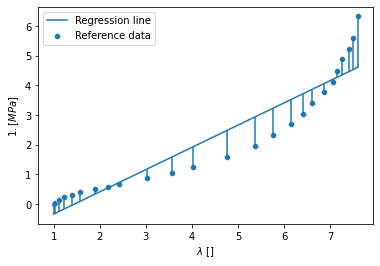

In [14]:
# Get predicted stresses from the whole strain data set
stresses_predicted = reg.predict(strains_train)

fig, ax = plt.subplots()

ax = sns.scatterplot(x =  df_ut.columns[0], y =  df_ut.columns[1], data=df_ut, label="Reference data")

ax1 = sns.lineplot(x =  df_ut.columns[0], y =  stresses_predicted, data=df_ut, label="Regression line")

plt.vlines(strains, stresses_predicted, stresses_train)

ax.set(xlabel=r'$\lambda \ []$', ylabel=r'$1. [MPa]$')

plt.show()

The linear fit does not match the reference data well. The residual error is quite large for all strains.

### Task 2
2.1. Next we want to perform a polynomial regression analysis of the form $P_i = \beta_0 + \beta_1 \lambda_i + \beta_2 \lambda_i^2$. Use `PolynomialFeatures` together with `LinearRegression()` from the `sklearn.preprocessing` library to fit again the stress-strain data for the uniaxial tension mode. What are the resulting regression cofficients?

**Hint:**  You need to import `PolynomialFeatures` from `sklearn.preprocessing`, where 


`degree` sets the degree of our polynomial function. `degree=2` means that we want to work with a 2nd degree polynomial \
 `include_bias=False` should be set to `False`, because we’ll use `PolynomialFeatures` together with `LinearRegression()` 

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

# Creating the new features
poly_features = poly.fit_transform(np.array(strains).reshape(-1, 1))
poly_features

array([[ 1.        ,  1.        ],
       [ 1.02423152,  1.04905021],
       [ 1.12114496,  1.25696602],
       [ 1.23416219,  1.52315631],
       [ 1.39557925,  1.94764145],
       [ 1.58118992,  2.50016156],
       [ 1.90388501,  3.62477812],
       [ 2.17820554,  4.74457936],
       [ 2.42025529,  5.85763568],
       [ 3.01728355,  9.10400002],
       [ 3.57398914, 12.77339839],
       [ 4.0339077 , 16.2724113 ],
       [ 4.76019601, 22.65946605],
       [ 5.36552897, 28.78890109],
       [ 5.75311953, 33.09838432],
       [ 6.14876198, 37.80727394],
       [ 6.40730738, 41.05358782],
       [ 6.60136179, 43.57797742],
       [ 6.85991982, 47.05849991],
       [ 7.05392367, 49.75783907],
       [ 7.15120368, 51.13971401],
       [ 7.25654822, 52.65749207],
       [ 7.40217751, 54.79223186],
       [ 7.49945752, 56.24186308],
       [ 7.60526976, 57.84012805]])

In [16]:
# Create the polynomial regression model
poly_reg_model = linear_model.LinearRegression()

# Fit the model to our training data
poly_reg_model.fit(poly_features, stresses_train)

print("Polynomial Equation (degree 2): %.4e +  (%.4e)x + (%.4e) x^2"%(poly_reg_model.intercept_, poly_reg_model.coef_[0], poly_reg_model.coef_[1]))

Polynomial Equation (degree 2): 7.8216e-01 +  (-5.6676e-01)x + (1.5413e-01) x^2


2.2. Compare the performance of this polynomial regression model against the linear regression model from the previous tasks.

In [17]:
# R-squared value to compare the model performance
stresses_predicted = poly_reg_model.predict(poly_features)
print("R-squared value: %.4e"%r2_score(y_true=np.array(stresses_train), y_pred=stresses_predicted))

R-squared value: 9.6986e-01


2.3. Visualize the reference data by Treloar for the uniaxial tension mode and the resulted regression line in one plot. What can you observed?

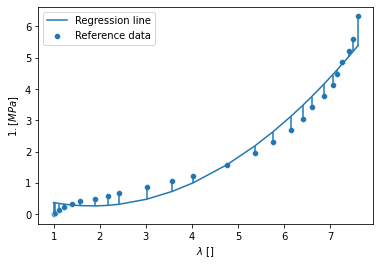

In [19]:
# Plot the regression model
fig, ax = plt.subplots()

ax = sns.scatterplot(x =  df_ut.columns[0], y =  df_ut.columns[1], data=df_ut, label="Reference data")

sns.lineplot(x =  df_ut.columns[0], y =  stresses_predicted, data=df_ut, label="Regression line")

plt.vlines(strains, stresses_predicted, stresses_train)

ax.set(xlabel=r'$\lambda \ []$', ylabel=r'$1. [MPa]$')

plt.show()

The polynomial fit with degree of $2$ matches the reference data better than the simple linear fit, however the residual error is quite large.

2.4. Increase the polynomial degree and fit and train the model again. Visualize the reference data by Treloar for the uniaxial tension mode and the resulted polynomial regression line in one plot.

Predicted stress value in the undeformed configuration: -2.9428e-02


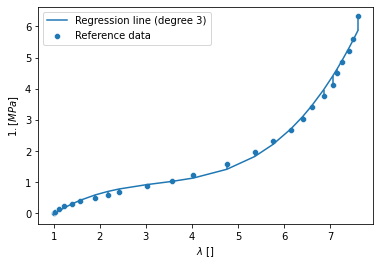

In [22]:
# Create and fit the model
poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(np.array(strains).reshape(-1, 1))

poly_reg_model = linear_model.LinearRegression()

poly_reg_model.fit(poly_features, stresses_train)

stresses_predicted = poly_reg_model.predict(poly_features)

# predict the stress value in the undeformed state (for Task 3.2)
print("Predicted stress value in the undeformed configuration: %0.4e"%(poly_reg_model.predict(poly.fit_transform([[1]]))[0]))

# Plot the regression model
fig, ax = plt.subplots()

ax = sns.scatterplot(x =  df_ut.columns[0], y =  df_ut.columns[1], data=df_ut, label="Reference data")

sns.lineplot(x =  df_ut.columns[0], y =  stresses_predicted, data=df_ut, label="Regression line (degree 3)")

plt.vlines(strains, stresses_predicted, stresses_train)

ax.set(xlabel=r'$\lambda \ []$', ylabel=r'$1. [MPa]$')

plt.show()

### Task 3
3.1. Load all three stress-strain data sets and fit them with a fourth order polynomial regression model.\
The polynomial function has the form $P_i = \beta_0 + \beta_1 \lambda_i + \beta_2 \lambda_i^2 + \beta_3 \lambda_i^3 + \beta_4 \lambda_i^4$. Visualize all three resluting regression lines together with the reference data in the same plot.

Predicted stress value in the undeformed configuration: 6.2753e-02
Predicted stress value in the undeformed configuration: 3.1318e-02


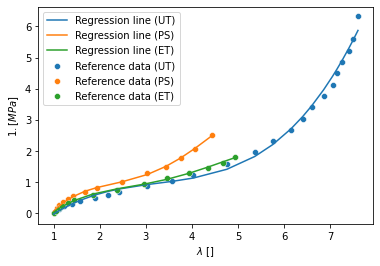

In [23]:
def regression(x_train, y_train) :
    
    poly = PolynomialFeatures(degree=4, include_bias=False)

    poly_features = poly.fit_transform(x_train) 

    poly_reg_model = linear_model.LinearRegression()

    poly_reg_model.fit(poly_features, y_train)

    y_predicted = poly_reg_model.predict(poly_features)

    # predict the stress value in the undeformed state (for Task 3.2)
    print("Predicted stress value in the undeformed configuration: %0.4e"%(poly_reg_model.predict(poly.fit_transform([[1]]))[0]))

    return y_predicted


# pure shear data
df_ps = pd.read_csv("./data/treloar_pure_shear.csv", delimiter=" ")
stresses = df_ps['stresses']
strains= df_ps['strains']

x_train_ps = np.array(strains).reshape(-1, 1) # sklearn requires in 2D array
y_train_ps = np.array(stresses)
y_predicted_ps = regression(x_train_ps, y_train_ps)

# equibiaxial tension data
df_et = pd.read_csv("./data/treloar_equibiaxial_tension.csv", delimiter=" ")
stresses = df_et['stresses']
strains= df_et['strains']
x_train_et= np.array(strains).reshape(-1, 1) # sklearn requires in 2D array
y_train_et = np.array(stresses)
y_predicted_et = regression(x_train_et, y_train_et)


# Plot 
fig, ax = plt.subplots()
ax = sns.scatterplot(x =  df_ut.columns[0], y =  stresses_train, data=df_ut, label = "Reference data (UT)")
sns.lineplot(x =  df_ut.columns[0], y =  stresses_predicted, data=df_ut, label= "Regression line (UT)")

sns.scatterplot(x =  df_ps.columns[0], y =  y_train_ps, data=df_ps, label = "Reference data (PS)")
sns.lineplot(x =  df_ps.columns[0], y =  y_predicted_ps, data=df_ps, label= "Regression line (PS)")

sns.scatterplot(x =  df_et.columns[0], y =  y_train_et, data=df_et, label = "Reference data (ET)")
sns.lineplot(x =  df_et.columns[0], y =  y_predicted_et, data=df_et, label= "Regression line (ET)")
ax.set(xlabel=r'$\lambda \ []$', ylabel=r'$1.  [MPa]$')
plt.show()

3.2.Discuss if this kind of network is applicable for simulations of realistic physical systems involving hyperelastic materials? If not, how could we improve this?

**Hints:** If you have trouble answering this question, here are a few more that might get you thinking:

* How could a network distinguish between the three deformation modes by a given strain state?
* What stresses would the network predict in a compression mode?
* What happens in the undeformed state. What value for the stress is predicted then? Is this physically realistic?
* How can the network ensure that the stress tensor is symmetric?
* Is the deformation reversible?

Some points could be:
If we increase the polynomial degree of the regression model, the residual error decreases. With a higher polynomial degree, the model is able to represent the stress-strain data from Treloars experiments. However, we don't validated our model. If we look at the predicted values, we see that this model is not sufficient to represent the constitutive behavior of hyperelastic material. The model can not distinguish between different deformation modes since it has no information about which of these three curves is associated with a specific strain state. Also, it can not predict what stresses will result if we compress the material, for example. 

If we look at the undeformed configuration of the material, $\lambda=0$, the predicted stresses are not zero, as we would assume from our theoretical knowledge. 

What we can see from this is that we need to incorporate additional information about the principles of mechanics and materials theory to improve the predictions.

In order to improve this, different approaches exist and this is still an emerging field. The key question is how experimental data can effectively be used to model the mechanical constitutive behavior of materials. They have in common that they involve physical information in some way.
We would require a large amount of data to train and test a neural network to represent the constitutive behavior of a specific material accurately if we only focused on stress-strain data and neglected advanced principles from materials theory or thermodynamics. These types of networks are called artificial-neural networks (ANNs). 

ANNs are highly general and do not, by default, incorporate any information about the principles of mechanics and materials theory. Additionally, they do not constrain their output to a physically reasonable range by default to ensure, for example, zero stresses in the undeformed state. 

One solution to overcome these limitations of standard ANNs as data-driven constitutive models is constitutive artificial neural networks (CANNs)[3]. In another lecture and exercise, you will get an insight into this approach.
